In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import learning_curve

In [49]:
lr_model = LinearRegression(normalize=True)

# Creating random number with a certain random seed number:

In [50]:
np.random.seed(1)
x = np.random.rand(200, 1) *1.5
y = 2.1+3.4*x+2.2*(x**2)-4.7*(x**3)+2.4*(x**4)
y=y+np.random.normal(scale=0.4, size=y.shape)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Creating Features for fitting:

In [51]:
PF=PolynomialFeatures(degree=16)
X=PF.fit_transform(x)

In [52]:
y_train=y[0:160]
y_test=y[160:201]

In [53]:
MSE_train=[]
MSE_test=[]
X_line=np.arange(-0.01,1.52,0.01).reshape(-1,1)

# Models predictions and actual data:

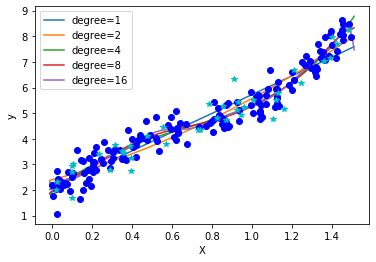

In [54]:
for i in [1,2,4,8,16]:
    
    X_train=X[0:160,1:i+1]
    X_test=X[160:201,1:i+1]
    
    lr_model.fit(X_train, y_train)
    h_train = lr_model.predict(X_train)
    h_test = lr_model.predict(X_test)
    MSE_train.append(np.mean((y_train - h_train) ** 2) / 2)
    MSE_test.append(np.mean((y_test - h_test) ** 2) / 2)
    X_line2=PF.fit_transform(X_line)
    y_line=lr_model.predict(X_line2[:,1:i+1])
    plt.plot(X_line, y_line)
Legend=['degree=1','degree=2','degree=4','degree=8','degree=16']
plt.legend(Legend)
plt.plot(X[0:160,1],y_train,'bo')
plt.plot(X[160:201,1],y_test,'c*')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# MSE versus degree of models:

Text(0, 0.5, 'MSE')

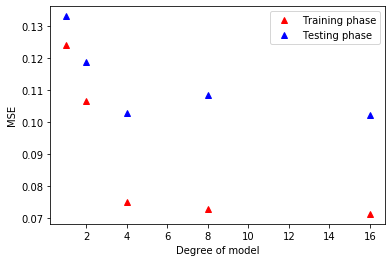

In [55]:
plt.plot([1,2,4,8,16],MSE_train,'r^')
plt.plot([1,2,4,8,16],MSE_test,'b^')
plt.legend(["Training phase", "Testing phase"])
plt.xlabel('Degree of model')
plt.ylabel('MSE')

# Learing Curves depiction for different models:

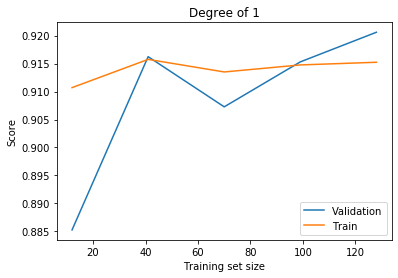

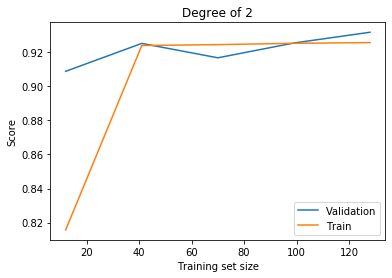

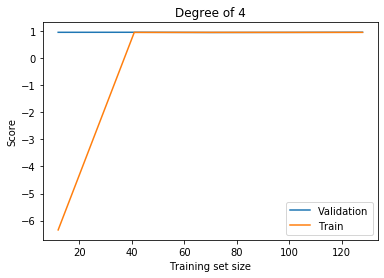

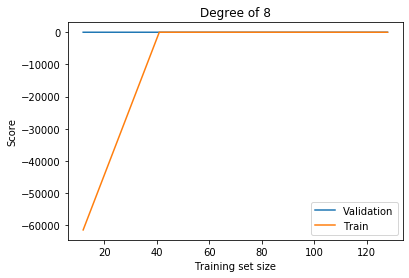

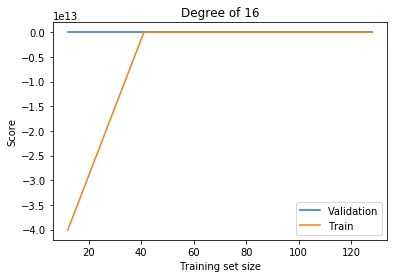

In [56]:
for i,ii in enumerate([1,2,4,8,16]):
    train_sizes, test_score, train_score=learning_curve(lr_model,X[0:160,1:ii+1],y_train, cv=5)
    plt.figure(i)
    plt.plot(train_sizes, test_score.mean(axis=1),label='Validation')
    plt.plot(train_sizes, train_score.mean(axis=1),label='Train')
    plt.title('Degree of '+str(ii))
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('Score')